# Ejercicio parte 1 : Creación de una malla no estructurada

En este ejemplo vamos a generar una malla irregular Voronoi para la cuenca de Angascancha. Debido a que las condiciones de borde de un drenaje generan cambios más localizados en el gradiente hidráulico se requiere que la malla se más refinada en los alrededores de la red hídrica.

El aporte de este tutorial es de crear un área de estudio delimitadora, para este caso la cuenca de Angascancha, y el refinamiento de mallas Voronoi alrededor de la red hídrica de la cuenca.


In [1]:
import os
import sys
#adding path to source directory
sys.path.insert(0, '../src')
import geopandas as gpd
from geoVoronoi import createVoronoi

#Create mesh object
vorMesh = createVoronoi()

#Define base refinement and refinement levels
vorMesh.defineParameters(maxRef = 500, minRef=50, stages=5)

#Open limit layers and refinement definition layers
vorMesh.addLimit('basin','../examples/In/shp/Angascancha_Basin_Extension.shp')
vorMesh.addLayer('facilities','../examples/In/shp/rios.shp')

#Generate point pair array
vorMesh.extractOrgVertices()

#Generate the point cloud and voronoi
vorMesh.createPointCloud()
vorMesh.generateVoronoi()

#check or create an output folder
outPath = '../examples/out/angascancha'
if os.path.isdir(outPath):
    print('The output folder %s exists'%outPath)
else:
    os.mkdir(outPath)
    print('The output folder %s has been generated.'%outPath)

#Export point data and voronoi polygons
#Points
vorMesh.getPointsAsShp('vertexOrg',outPath+'/vertexOrg.shp')
vorMesh.getPointsAsShp('vertexDist',outPath+'/vertexDist.shp')
vorMesh.getPointsAsShp('vertexBuffer',outPath+'/vertexBuffer.shp')
vorMesh.getPointsAsShp('vertexMaxRef',outPath+'/vertexMaxRef.shp')
vorMesh.getPointsAsShp('vertexMinRef',outPath+'/vertexMinRef.shp')
vorMesh.getPointsAsShp('vertexTotal',outPath+'/vertexTotal.shp')
#Polygons

vorMesh.getPolyAsShp('voronoiRegions',outPath+'/voronoiRegions.shp')



/--------Sumary of cell discretization-------/
Maximun refinement: 500.00 m.
Minimum refinement: 50.00 m.
Cell size list: [500.  387.5 275.  162.5  50. ] m.
/--------------------------------------------/


/----Sumary of points for voronoi meshing----/
Distributed points from layers: 3396
Points from layer buffers: 10317
Points from max refinement areas: 437
Points from min refinement areas: 0
Total points inside the limit: 14086
/--------------------------------------------/

Time required for point generation: 11.90 seconds 



C:\Users\jose\anaconda3\envs\work_env\lib\site-packages\shapely\geometry\multipolygon.py:202: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  shell = ob[0]
C:\Users\jose\anaconda3\envs\work_env\lib\site-packages\shapely\geometry\multipolygon.py:203: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  holes = ob[1]


The output folder ../examples/out/angascancha exists


In [21]:
mesh=gpd.read_file(outPath+'/voronoiRegions.shp')

<AxesSubplot:>

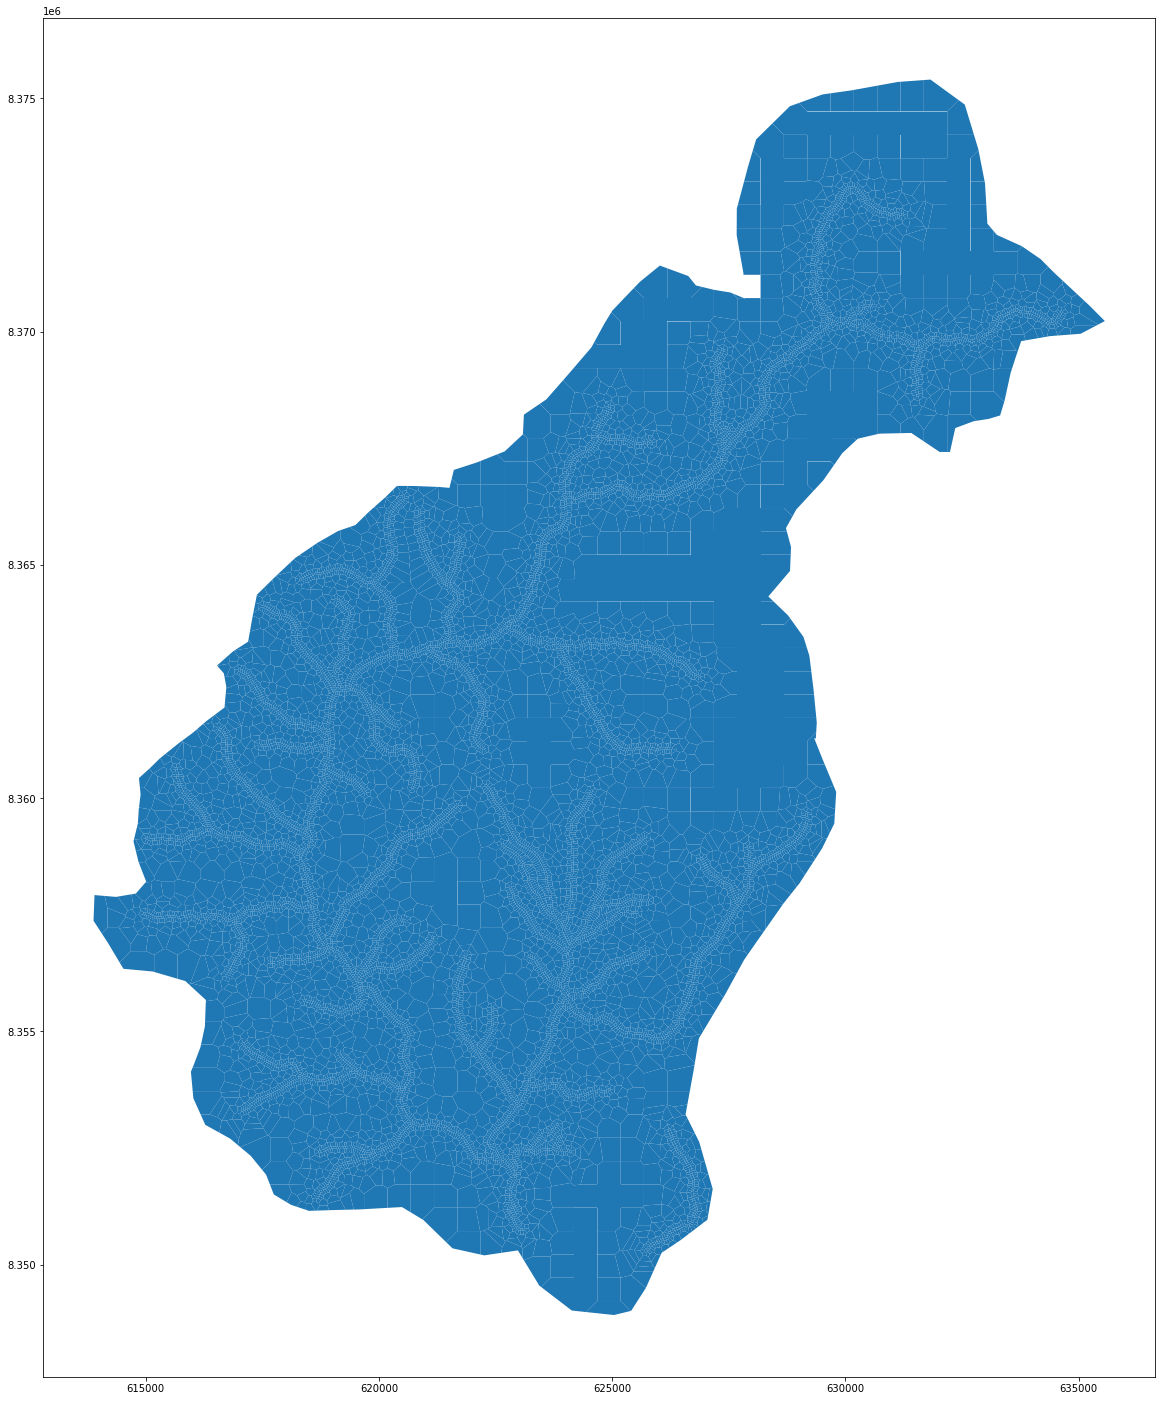

In [23]:
mesh.plot(figsize=(35,25))
